# Feature Extraction
## Mel frequency cepstral coefficients (MFCC)
- The MFCCs of a signal are a small set of features (usually about 10–20) that concisely describe the overall shape of a spectral envelope. 
- So in given 10 to 20 feature set, the music information is packed for the all music frames
- It models the characteristics of the human voice.
  
### Library.function  
- librosa.feature.mfcc computes MFCCs across an audio signal

In [1]:
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import minmax_scale

In [2]:
!ls

0-Installation.ipynb
1-Quick-librosa-introduction.ipynb
2_beat_retrival_from_music.ipynb
3-music-generation-save.ipynb
FE_Mel-Frequency_Cepstral_Coefficients.ipynb
FE_chroma_frequencies.ipynb
FE_spectral_centroid.ipynb
FE_spectral_rolloff.ipynb
FE_zero-crossing-rate.ipynb
royalty-free-music
temp_file_1.wav
temp_file_48000.wav


In [3]:
source_audio = 'royalty-free-music/58bpm.wav'

In [4]:
wave_x, sample_rate = librosa.load(source_audio)
ipd.Audio(wave_x, rate=sample_rate)

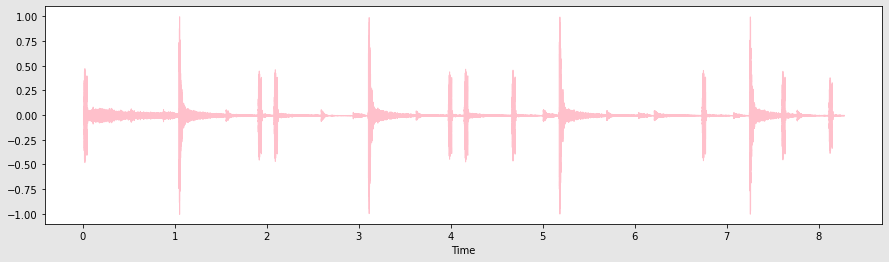

In [5]:
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(wave_x, sr=sample_rate, color='pink')

In [6]:
mfccs = librosa.feature.mfcc(wave_x, sr=sample_rate)
print(mfccs.shape)

(20, 357)


/var/folders/j9/zkczhkln1w95vm9cj3p_qzhr0000gp/T/ipykernel_92965/918857068.py:1: FutureWarning: Pass y=[ 0.00375366 -0.01208496 -0.00830078 ...  0.00195312  0.0017395
  0.00219727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(wave_x, sr=sample_rate)


### Above 20 MFCC features for the 357 frames 

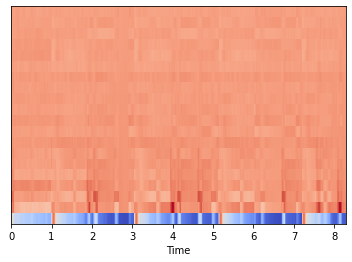

In [7]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

[ 0.0000000e+00 -1.0685427e-08  0.0000000e+00  0.0000000e+00
  2.1370854e-08 -1.0685427e-08  2.6713567e-09 -2.6713567e-09
  5.3427134e-09 -7.3462307e-09  1.0685427e-08  8.0140703e-09
 -8.0140703e-09  1.0685427e-08  0.0000000e+00  0.0000000e+00
 -5.3427134e-09  0.0000000e+00  0.0000000e+00  0.0000000e+00]
[1.         1.         1.0000001  1.0000001  1.         0.99999994
 1.         1.         1.         1.         0.99999994 1.
 0.99999994 1.         1.0000001  1.0000001  1.0000001  0.9999998
 1.         1.0000001 ]


/Users/avkash/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/avkash/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


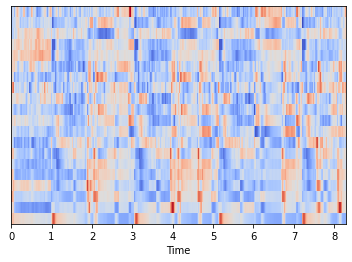

In [8]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')


In [9]:
def count_mfcc(source_file_name):
    temp_wave_x, temp_sample_rate = librosa.load(source_file_name)
    mfccs = librosa.feature.mfcc(temp_wave_x, sr=temp_sample_rate)
    print("Total MFCC features " + str(mfccs.shape[0]) + " for the total " + str(mfccs.shape[1]) + " frames." )    

In [11]:
!ls


0-Installation.ipynb
1-Quick-librosa-introduction.ipynb
2_beat_retrival_from_music.ipynb
3-music-generation-save.ipynb
FE_Mel-Frequency_Cepstral_Coefficients.ipynb
FE_chroma_frequencies.ipynb
FE_spectral_centroid.ipynb
FE_spectral_rolloff.ipynb
FE_zero-crossing-rate.ipynb
royalty-free-music
temp_file_1.wav
temp_file_48000.wav


In [13]:
!ls royalty-free-music

58bpm.wav            T08-violin.wav       bensound-dubstep.mp3


In [12]:
count_mfcc('temp_file_1.wav')

Total MFCC features 20 for the total 5379 frames.


/var/folders/j9/zkczhkln1w95vm9cj3p_qzhr0000gp/T/ipykernel_92965/2932131824.py:3: FutureWarning: Pass y=[ 4.4278131e-06 -2.6565946e-05 -2.2345072e-05 ... -9.5257245e-04
 -1.0788566e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(temp_wave_x, sr=temp_sample_rate)


In [ ]:
!ls royalty-free-music

In [15]:
count_mfcc('royalty-free-music/T08-violin.wav')

Total MFCC features 20 for the total 775 frames.


/var/folders/j9/zkczhkln1w95vm9cj3p_qzhr0000gp/T/ipykernel_92965/2932131824.py:3: FutureWarning: Pass y=[-0.00202265 -0.00320533 -0.00137628 ...  0.00089052  0.00087279
  0.0009666 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(temp_wave_x, sr=temp_sample_rate)
